In [1]:
import cv2 as cv
import sys
import numpy as np
from math import *
import matplotlib.pyplot as plt

# Funções auxiliares

In [2]:
# Filtros:
a = 1/9
A = np.array([
    [a, a, a],
    [a, a, a],
    [a, a, a],
])

Sobel_x = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
])
Sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

D_gaussian_5x5 = np.array([
    [0.0235, 0.0335, 0.0383, 0.0335, 0.0235],
    [0.0335, 0.0477, 0.0545, 0.0477, 0.0335],
    [0.0383, 0.0545, 0.0623, 0.0545, 0.0383],
    [0.0335, 0.0477, 0.0545, 0.0477, 0.0335],
    [0.0235, 0.0335, 0.0383, 0.0335, 0.0235]
])


In [3]:

def mostrar_diferenca(img_original, img_modificada, title="diferença"):
    img_original = np.clip(img_original, 0, 255).astype(np.uint8)
    img_modificada = np.clip(img_modificada, 0, 255).astype(np.uint8)

    img_original = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    img_modificada = cv.cvtColor(img_modificada, cv.COLOR_BGR2RGB)

    plt.figure(figsize=(12,5))
    plt.suptitle(title, fontsize=18, fontweight='bold', color='green')
    plt.subplot(121), plt.imshow(img_original), plt.title('Original')
    plt.subplot(122), plt.imshow(img_modificada), plt.title("Modificada")
    plt.tight_layout()
    plt.show()

def normalizar_imagem(img):
    height, width = img.shape[:2]
    img_f = img.astype(float) 
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            img_f[l,c,0] = r/255
            img_f[l,c,1] = g/255
            img_f[l,c,2] = b/255
    return img_f

def desnormalizar_imagem(img):
    height, width = img.shape[:2]
    img_f = img.astype(int) 
    for l in range(height):
        for c in range(width):
            r = img[l,c,0]
            g = img[l,c,1]
            b = img[l,c,2]
            img_f[l,c,0] = r*255 
            img_f[l,c,1] = g*255
            img_f[l,c,2] = b*255
    return img_f

In [4]:
def filter(img, M):
    # Usando somente o canal vermelho:
    m, n = M.shape
    m_ = int(m/2)
    height, width = img.shape[:2]
    img_fiter = img.copy()
    for i in range(height):
        for j in range(width):
            if (j + m_ + 1 >= width or j - m_ <= 0 or i + m_ + 1 >= height or i - m_ < 0):
                continue
            for channel in range(3):
                I = img[i - m_: i + m_ + 1,j - m_: j + m_ + 1,channel]
                pixel_count = 0
                for i_ in range(m):
                    for j_ in range(n):
                        pixel_count += M[m - 1 - i_, n - 1 - j_] * I[i_, j_]
                img_fiter[i, j, channel] = pixel_count


    return img_fiter   
            

# Questão 3

## a)

- Será usado o filtro gaussiano para diminuir o ruído da imagem.

In [13]:
img_pimenta_ruido = cv.imread('pimentas_ruido.png')
img_blur = filter(img_pimenta_ruido, M=D_gaussian_5x5)
print(f"filtro:\n{D_gaussian_5x5}")



filtro:
[[0.0235 0.0335 0.0383 0.0335 0.0235]
 [0.0335 0.0477 0.0545 0.0477 0.0335]
 [0.0383 0.0545 0.0623 0.0545 0.0383]
 [0.0335 0.0477 0.0545 0.0477 0.0335]
 [0.0235 0.0335 0.0383 0.0335 0.0235]]


In [6]:
cv.imwrite("q3.png", img_blur)

True

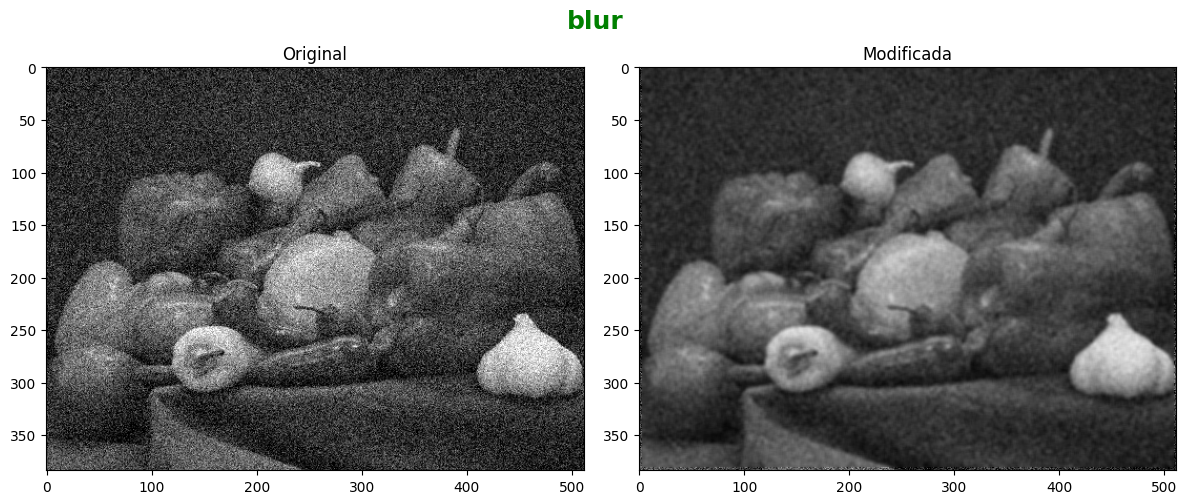

In [7]:
mostrar_diferenca(img_modificada=img_blur, img_original=img_pimenta_ruido, title="blur")

## b)

In [8]:
img_pimentas_original = cv.imread('pimentas_original.png')

In [9]:
Dx = filter(img_pimentas_original, M=Sobel_x)

In [10]:
Dy = filter(img_pimentas_original, M=Sobel_y)

In [11]:
D_y = normalizar_imagem(Dy)
D_x = normalizar_imagem(Dx)
D_pimentas = np.sqrt((D_y*D_y + D_x*D_x))
D_pimentas = desnormalizar_imagem(D_pimentas)
cv.imwrite("D_pimentas.png",D_pimentas)



True

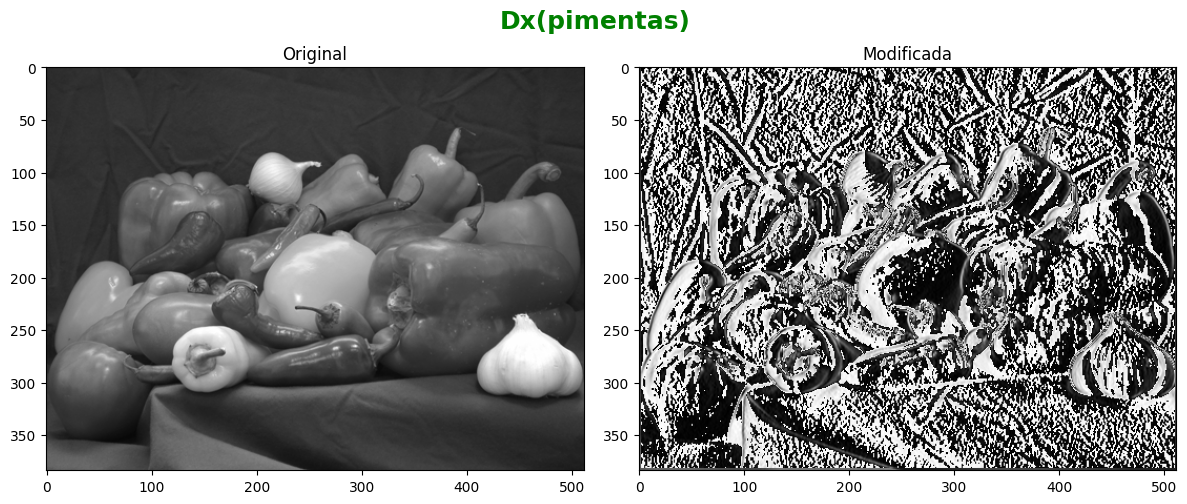

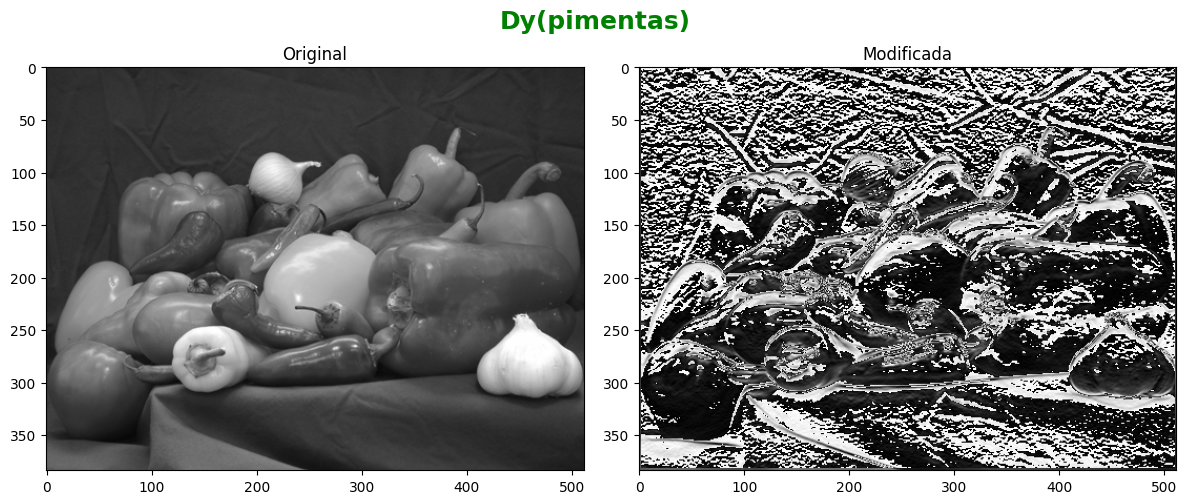

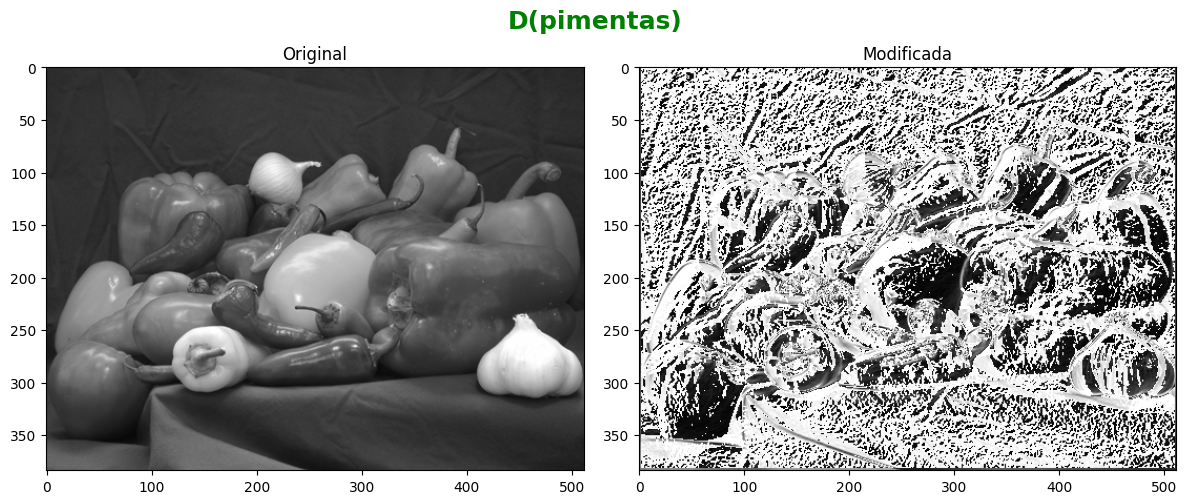

In [12]:
mostrar_diferenca(img_original=img_pimentas_original, img_modificada=Dx, title='Dx(pimentas)')
mostrar_diferenca(img_original=img_pimentas_original, img_modificada=Dy, title='Dy(pimentas)')
mostrar_diferenca(img_original=img_pimentas_original, img_modificada=D_pimentas, title='D(pimentas)')